In [1]:
import sys
import os
# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Add it to sys.path
sys.path.append(project_root)

In [2]:
import numpy as np
from bimpcc.dataset import get_dataset
from bimpcc.tv_reconstruct import TVReconstruct
from bimpcc.utils_recons import apply_blur, gaussian_psf
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

In [3]:
def plot_experiment(true,blur,u, alpha):
    
    fig,ax = plt.subplots(1,3,figsize=(14,4))
    ax[0].imshow(true,cmap='gray')
    ax[0].set_title('True Image')
    ax[0].axis('off')
    ax[1].imshow(blur,cmap='gray')
    ax[1].set_title('Noisy Image\nPSNR: {:.4f}'.format(psnr(true,blur)))
    ax[1].axis('off')
    ax[2].imshow(u,cmap='gray')
    ax[2].set_title(f'Reconstructed Image\nPSNR: {psnr(true,u):.4f}\n alpha = {alpha}')
    # ax[2].set_xlabel('alpha = {}'.format(alpha))
    ax[2].axis('off')

    plt.show()

In [14]:
scale = 15

In [15]:
dataset = get_dataset("cameraman",scale=scale)
true, _= dataset.get_training_data()
psf_0 = gaussian_psf(7,1)
blur_img = apply_blur(true, psf_0)

(np.float64(-0.5), np.float64(14.5), np.float64(14.5), np.float64(-0.5))

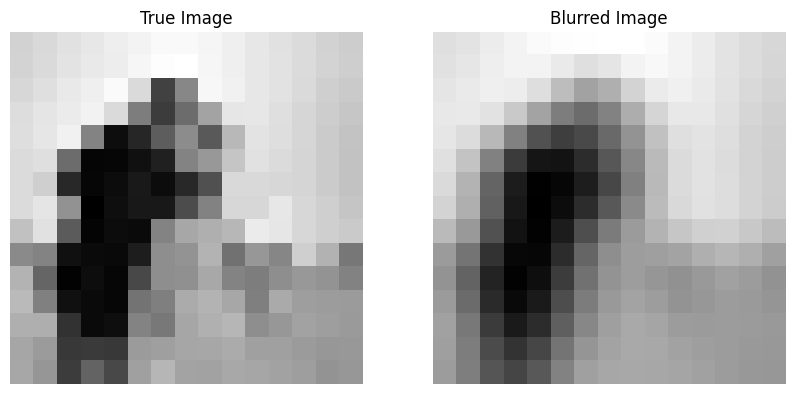

In [16]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(true,cmap='gray')
ax[0].set_title('True Image')
ax[0].axis('off')
ax[1].imshow(blur_img,cmap='gray')
ax[1].set_title('Blurred Image')
ax[1].axis('off')

In [17]:
model = TVReconstruct(true, blur_img, epsilon=1e-3)

In [18]:
res_mpcc,x_opt_mpcc,fun_opt_mpcc = model.solve(max_iter=100,tol=1e-4,print_level=5,verbose=True)

Iter   Termination_status            Objective      MPCC_compl               t

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    27189
Number of nonzeros in inequality constraint Jacobian.:     1050
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:     1276
                     variables with only lower bounds:      646
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1065
Total number of inequality constraints...............:      420
        inequality constraints with only lower bounds:      420
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.7628918e+00 2.81e-01 1.39e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

0                -3  1.0130935847888158      3.058492868218478                  1.0

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    27189
Number of nonzeros in inequality constraint Jacobian.:     1050
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:     1276
                     variables with only lower bounds:      646
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1065
Total number of inequality constraints...............:      420
        inequality constraints with only lower bounds:      420
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.7628918e+00 2.81e-01 1.39e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

1                 0  1.0091653052077718      3.526055222553296                  1.1

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    27189
Number of nonzeros in inequality constraint Jacobian.:     1050
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:     1276
                     variables with only lower bounds:      646
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1065
Total number of inequality constraints...............:      420
        inequality constraints with only lower bounds:      420
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0114904e+00 5.80e-01 1.58e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

2                -3  0.973487448598063       1.7690647132588722      0.49500000000000005

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    27189
Number of nonzeros in inequality constraint Jacobian.:     1050
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:     1276
                     variables with only lower bounds:      646
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1065
Total number of inequality constraints...............:      420
        inequality constraints with only lower bounds:      420
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0114904e+00 5.30e-01 1.58e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

3                 0  0.9718099322651219      1.9171103100549522      0.5445000000000001

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    27189
Number of nonzeros in inequality constraint Jacobian.:     1050
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:     1276
                     variables with only lower bounds:      646
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1065
Total number of inequality constraints...............:      420
        inequality constraints with only lower bounds:      420
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  9.7660476e-01 2.96e-01 1.55e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

4                 0  0.9824477499356974      0.9083283706037566      0.22052250000000007

                               = 13.393

EXIT: Optimal Solution Found.
This is Ipopt version 3.14.17, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    27189
Number of nonzeros in inequality constraint Jacobian.:     1050
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:     1276
                     variables with only lower bounds:      646
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1065
Total number of inequality constraints...............:      420
        inequality constraints with only lower bounds:      420
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

5                 0  1.0128956051266156      0.5345369559748288      0.08931161250000003

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    27189
Number of nonzeros in inequality constraint Jacobian.:     1050
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:     1276
                     variables with only lower bounds:      646
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1065
Total number of inequality constraints...............:      420
        inequality constraints with only lower bounds:      420
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0147989e+00 3.64e-02 1.24e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

6                 0  1.0098930304937097      0.3472001205756291      0.03617120306250001

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    27189
Number of nonzeros in inequality constraint Jacobian.:     1050
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:     1276
                     variables with only lower bounds:      646
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1065
Total number of inequality constraints...............:      420
        inequality constraints with only lower bounds:      420
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0198874e+00 1.00e-02 1.04e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

7                 0  1.0217092885648014      0.16423373915046258     0.014649337240312506

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    27189
Number of nonzeros in inequality constraint Jacobian.:     1050
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:     1276
                     variables with only lower bounds:      646
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1065
Total number of inequality constraints...............:      420
        inequality constraints with only lower bounds:      420
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0304133e+00 1.00e-02 9.06e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

8                 0  1.032149358554165       0.07868660196869634     0.005932981582326566

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    27189
Number of nonzeros in inequality constraint Jacobian.:     1050
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:     1276
                     variables with only lower bounds:      646
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1065
Total number of inequality constraints...............:      420
        inequality constraints with only lower bounds:      420
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0343995e+00 1.00e-02 1.05e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

9                 0  1.048896147358113       0.03864635168852171     0.0024028575408422594

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    27189
Number of nonzeros in inequality constraint Jacobian.:     1050
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:     1276
                     variables with only lower bounds:      646
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1065
Total number of inequality constraints...............:      420
        inequality constraints with only lower bounds:      420
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0518784e+00 1.00e-02 9.53e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

10                 0  1.0650590541464795      0.020377055087834002    0.0009731573040411151

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    27189
Number of nonzeros in inequality constraint Jacobian.:     1050
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:     1276
                     variables with only lower bounds:      646
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1065
Total number of inequality constraints...............:      420
        inequality constraints with only lower bounds:      420
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0650591e+00 1.00e-02 9.66e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

11                 0  1.0768344835910986      0.009602831692297647    0.00039412870813665163

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    27189
Number of nonzeros in inequality constraint Jacobian.:     1050
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:     1276
                     variables with only lower bounds:      646
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1065
Total number of inequality constraints...............:      420
        inequality constraints with only lower bounds:      420
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0768345e+00 1.00e-02 9.78e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

12                 0  1.0860130635405976      0.006138024437364974    0.00015962212679534392

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    27189
Number of nonzeros in inequality constraint Jacobian.:     1050
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:     1276
                     variables with only lower bounds:      646
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1065
Total number of inequality constraints...............:      420
        inequality constraints with only lower bounds:      420
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0860131e+00 1.00e-02 9.35e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

13                 0  1.0966082998087299      0.004915005116550679    6.464696135211429e-05

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    27189
Number of nonzeros in inequality constraint Jacobian.:     1050
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:     1276
                     variables with only lower bounds:      646
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1065
Total number of inequality constraints...............:      420
        inequality constraints with only lower bounds:      420
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0966083e+00 1.00e-02 9.30e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

14                 0  1.1108515285269256      0.005467396812452411    2.618201934760629e-05


Number of Iterations....: 77

                                   (scaled)                 (unscaled)
Objective...............:   1.1108515285269256e+00    1.1108515285269256e+00
Dual infeasibility......:   1.1563609132736463e-09    1.1563609132736463e-09
Constraint violation....:   2.6541269182445149e-16    2.6541269182445149e-16
Variable bound violation:   9.9998451977712649e-09    9.9998451977712649e-09
Complementarity.........:   1.0000000491389964e-11    1.0000000491389964e-11
Overall NLP error.......:   1.1563609132736463e-09    1.1563609132736463e-09


Number of objective function evaluations             = 83
Number of objective gradient evaluations             = 78
Number of equality constraint evaluations            = 83
Number of inequality constraint evaluations          = 83
Number of equality constraint Jacobian evaluations   = 78
Number of inequality constraint Jacobian evaluations = 78
Number of Lagrangian Hessian evaluations             = 0
Total seconds in IPOPT       

15                 0  1.1459569127741263      0.006478764564164773    1.0603717835780548e-05

Intermediate result:  message: b'Algorithm terminated successfully at a locally optimal point, satisfying the 
convergence tolerances (can be specified by options).'
 success: True
  status: 0
     fun: 1.1459569127741263
       x: [ 8.338e-01  8.338e-01 ... -2.719e+00  3.303e-03]
     nit: 1533
    info:     status: 0
                   x: [ 8.338e-01  8.338e-01 ... -2.719e+00  3.303e-03]
                   g: [ 1.171e-03  2.305e-04 ... -2.168e-19 -4.337e-19]
             obj_val: 1.1459569127741263
              mult_g: [-6.513e-09 -4.142e-08 ...  1.297e-01 -1.391e-07]
            mult_x_L: [ 1.199e-11  1.199e-11 ...  0.000e+00  3.027e-09]
            mult_x_U: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
          status_msg: b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence 
tolerances (can be specified by options).'
    nfev: 1538
    njev: 1535

Intermediate fn: 1.1459569127741263

complementarity: 0.006478764564164773

* (STOPPED) Iteration 17: Solving the NLP problem for t = 1e-05 with complementarity: 0.006478764564164773

In [19]:
u_mpcc, q_mpcc, r_mpcc, delta_mpcc, theta_mpcc, alpha_mpcc = model.objective_func.parse_vars(x_opt_mpcc)

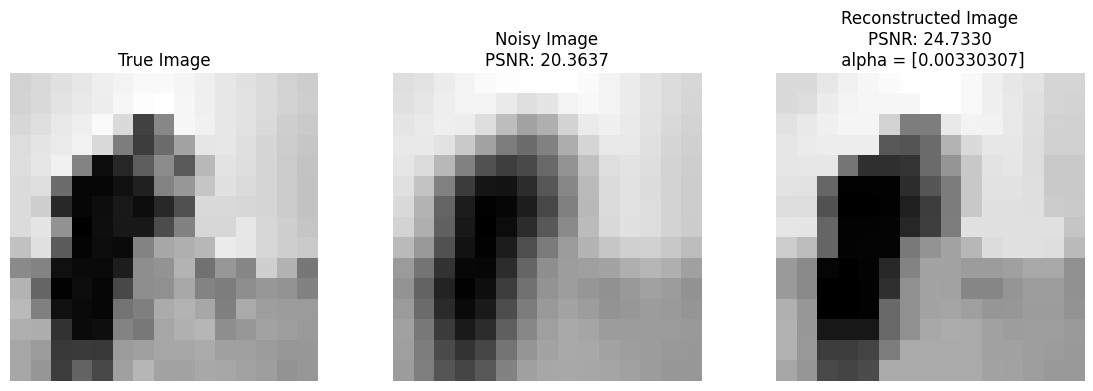

In [20]:
u_mpcc = u_mpcc.reshape((scale,scale))
plot_experiment(true,blur_img,u_mpcc,alpha_mpcc)